In [2]:
import os
import random
import glob

from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
import torch

import pandas as pd
import numpy as np

In [3]:
data_dir = "./images"
classes = os.listdir(data_dir)
classes.remove(".gitkeep")
classes

['풀업', '스쿼트', '벤치프레스', '데드리프트', '오버헤드프레스']

In [4]:
classes_dic = {}
for i, cls in enumerate(classes):
    classes_dic[cls] = i                  # data_dic[]
print(classes_dic)
print(classes)

{'풀업': 0, '스쿼트': 1, '벤치프레스': 2, '데드리프트': 3, '오버헤드프레스': 4}
['풀업', '스쿼트', '벤치프레스', '데드리프트', '오버헤드프레스']


In [5]:
data = glob.glob(os.path.join(data_dir + '/*/*.jpg'))

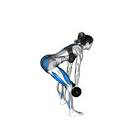

473 tensor([3]) 데드리프트


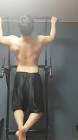

100 tensor([0]) 풀업


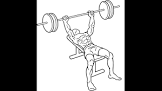

444 tensor([3]) 데드리프트


In [6]:
for i in range(3):
    index = random.randint(100, 600)
    image = data[index]
    # label = self.data[index].split('\\')[-2]
    label = classes_dic[Path(image).parts[-2]]
    # print(label)
    image = Image.open(image)
    image.show()
    # print(image, label)
    image = np.array(image)

    image = torch.FloatTensor(image)
    label = torch.LongTensor([int(label)])
    print(index, label, classes[label])

In [7]:
len(data)

600